(0.0, 511.0, 0.0, 127.0)

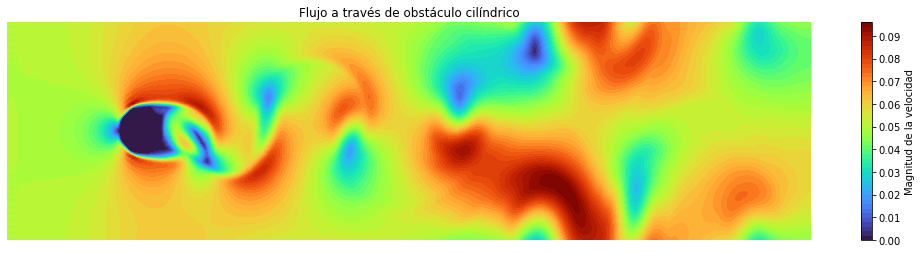

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
plt.rcParams['figure.figsize'] = [18, 4]
plt.rcParams.update({'font.size': 10})
#U = np.loadtxt(os.path.join('..', 'lbsim cldr',
                            #'flowvfield_cylinder.csv'), delimiter=',')
U = np.loadtxt(os.path.join('..', 'lbsim cldr',
                            'Original',"csvdata","vel.0160.csv"), delimiter=',')

plt.contourf(U,60,cmap="turbo")
plt.title("Flujo a través de obstáculo cilíndrico")
plt.colorbar().set_label("Magnitud de la velocidad")
plt.axis("off")

In [2]:
nx, ny = 512, 128   # Numer of lattice nodes.
cx, cy, r = nx//6, ny//2, ny//9  # Coordinates of the cylinder.


def obstacle_fun(x, y):
    return (x-cx)**2+(y-cy)**2 < r**2


obstacle = np.fromfunction(obstacle_fun, (nx, ny))

obstacle = obstacle.T


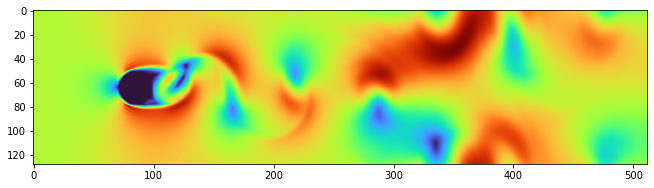

In [7]:
for i in range(128):
    for j in range(512):
        if obstacle[i, j] == True:
            U[i, j] = 0


def write_csv(filename):
    import csv

    f = open(filename, 'w', newline='')
    for velocity in U:
        csv.writer(f).writerow(velocity)
    f.close()


write_csv(os.path.join(
    "..", "lbsim cldr", "flowvfield_cylinder.csv"))

plt.imshow(U, cmap="turbo")


(0.0, 511.0, 0.0, 127.0)

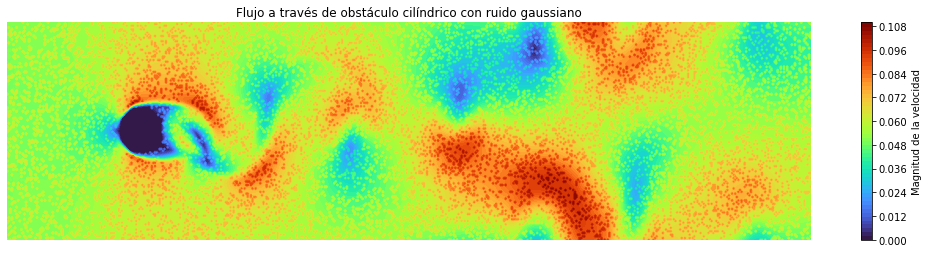

In [3]:
# Add noise to data
noise = 0.00005*np.random.randn(*U.shape).astype('uint8')  # Add some noise
Unoise = U + noise

# clean noise from obstacle
for i in range(128):
    for j in range(512):
        if obstacle[i, j] == True:
            Unoise[i, j] = U[i, j]

plt.contourf(Unoise,60,cmap="turbo")
plt.title("Flujo a través de obstáculo cilíndrico con ruido gaussiano")
plt.colorbar().set_label("Magnitud de la velocidad")
plt.axis("off")

In [4]:
# Function Definitions

def shrink(X, tau):
    Y = np.abs(X)-tau
    return np.sign(X) * np.maximum(Y, np.zeros_like(Y))


def SVT(X, tau):
    U, S, VT = np.linalg.svd(X, full_matrices=0)
    out = U @ np.diag(shrink(S, tau)) @ VT
    return out


def RPCA(X):
    n1, n2 = X.shape
    mu = n1*n2/(4*np.sum(np.abs(X.reshape(-1))))
    lambd = 1/np.sqrt(np.maximum(n1, n2))
    thresh = 10**(-7) * np.linalg.norm(X)

    S = np.zeros_like(X)
    Y = np.zeros_like(X)
    L = np.zeros_like(X)
    count = 0
    while (np.linalg.norm(X-L-S) > thresh) and (count < 10000):
        L = SVT(X-S+(1/mu)*Y, 1/mu)
        S = shrink(X-L+(1/mu)*Y, lambd/mu)
        Y = Y + mu*(X-L-S)
        count += 1
    return L, S


In [5]:
X = Unoise
L, S = RPCA(X)


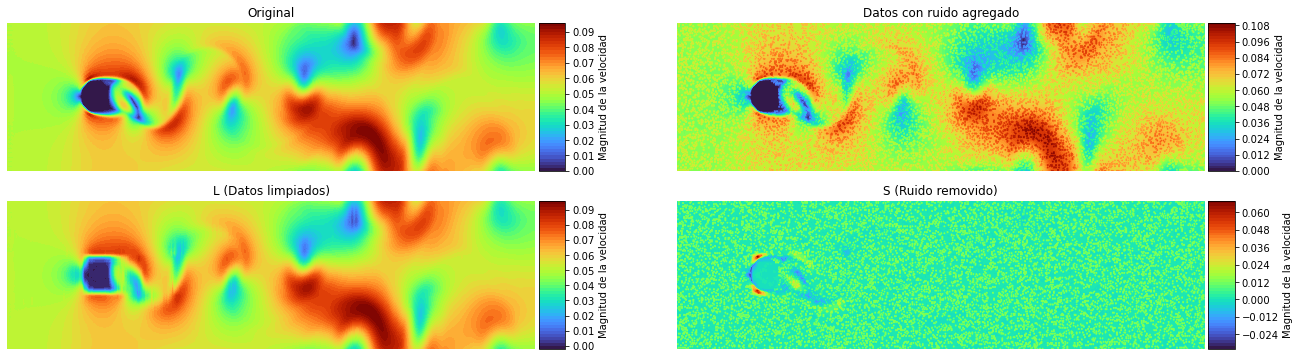

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(22, 6))
ax1 = fig.add_subplot(221)
im1 = ax1.contourf(U, 60, cmap="turbo")
ax1.set_title("Original")
plt.axis("off")
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax, orientation="vertical").set_label("Magnitud de la velocidad")

ax2 = fig.add_subplot(222)
im2 = ax2.contourf(Unoise, 60, cmap="turbo")
ax2.set_title("Datos con ruido agregado")
plt.axis("off")
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im2, cax=cax, orientation="vertical").set_label("Magnitud de la velocidad")

ax3 = fig.add_subplot(223)
im3 = ax3.contourf(L, 60, cmap="turbo")
ax3.set_title("L (Datos limpiados)")
plt.axis("off")
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im3, cax=cax, orientation="vertical").set_label("Magnitud de la velocidad")

ax4 = fig.add_subplot(224)
im4 = ax4.contourf(S, 60, cmap="turbo")
ax4.set_title("S (Ruido removido)")
plt.axis("off")
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im4, cax=cax, orientation="vertical").set_label("Magnitud de la velocidad")



(0.0, 511.0, 0.0, 127.0)

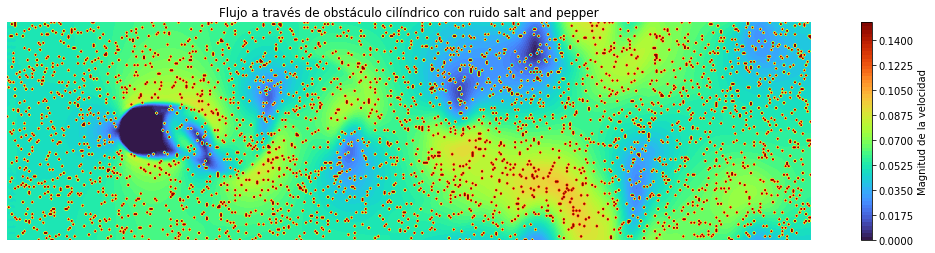

In [7]:
plt.rcParams['figure.figsize'] = [18, 4]
plt.rcParams.update({'font.size': 10})
# Add noise to data
eta = 0.10

if eta != 0:
    rep = np.std(U[:])*10
    x = np.random.rand(U[:, :].size)
    b = np.sort(x[:])
    thresh = b[int(np.floor(0.5*eta*b.size))]
    bl = x < thresh
    bl = bl.reshape(ny, nx)

    Un = np.where(bl == False, U, rep)

# clean noise from obstacle
for i in range(128):
    for j in range(512):
        if obstacle[i, j] == True:
            Un[i, j] = U[i, j]

plt.contourf(Un,60, cmap="turbo")
plt.title("Flujo a través de obstáculo cilíndrico con ruido salt and pepper")
plt.colorbar().set_label("Magnitud de la velocidad")
plt.axis("off")

In [8]:
X = Un
L, S = RPCA(X)


In [19]:
for i in range(128):
    for j in range(512):
        if obstacle[i, j] == True:
            L[i, j] = U[i, j]


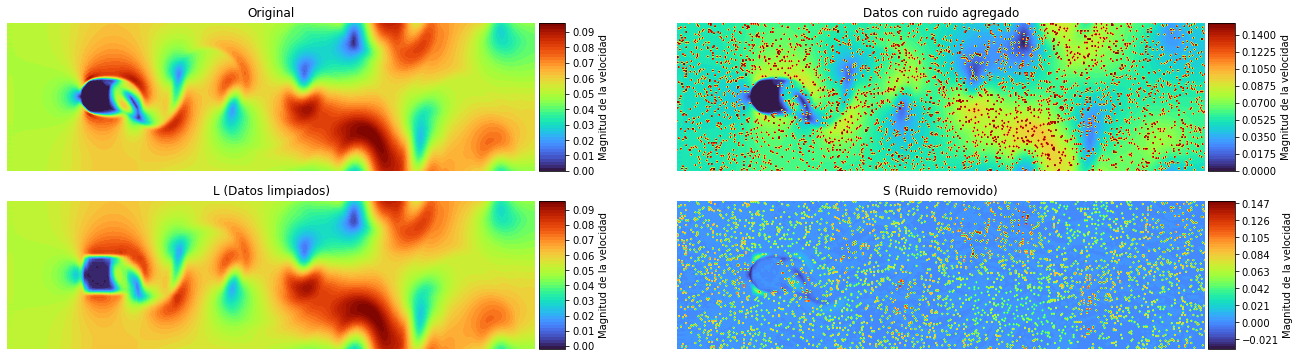

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(22, 6))
ax1 = fig.add_subplot(221)
im1 = ax1.contourf(U, 60, cmap="turbo")
ax1.set_title("Original")
plt.axis("off")
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax, orientation="vertical").set_label("Magnitud de la velocidad")

ax2 = fig.add_subplot(222)
im2 = ax2.contourf(Un, 60, cmap="turbo")
ax2.set_title("Datos con ruido agregado")
plt.axis("off")
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im2, cax=cax, orientation="vertical").set_label("Magnitud de la velocidad")

ax3 = fig.add_subplot(223)
im3 = ax3.contourf(L, 60, cmap="turbo")
ax3.set_title("L (Datos limpiados)")
plt.axis("off")
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im3, cax=cax, orientation="vertical").set_label("Magnitud de la velocidad")

ax4 = fig.add_subplot(224)
im4 = ax4.contourf(S, 60, cmap="turbo")
ax4.set_title("S (Ruido removido)")
plt.axis("off")
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im4, cax=cax, orientation="vertical").set_label("Magnitud de la velocidad")



(0.0, 511.0, 0.0, 127.0)

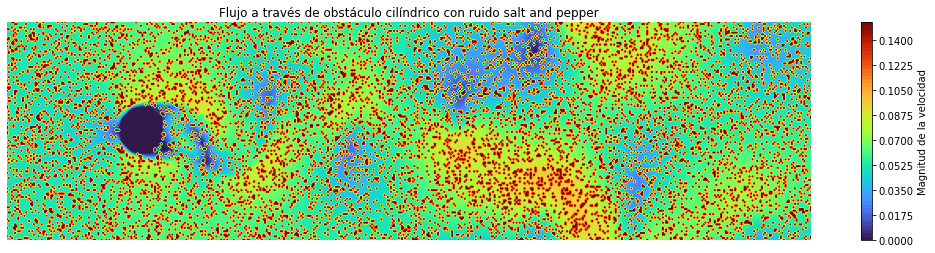

In [5]:
eta = 0.30

if eta != 0:
    rep = np.std(U[:])*10
    x = np.random.rand(U[:, :].size)
    b = np.sort(x[:])
    thresh = b[int(np.floor(0.5*eta*b.size))]
    bl = x < thresh
    bl = bl.reshape(ny, nx)

    Un = np.where(bl == False, U, rep)

# clean noise from obstacle
for i in range(128):
    for j in range(512):
        if obstacle[i, j] == True:
            Un[i, j] = U[i, j]

plt.contourf(Un,60, cmap="turbo")
plt.title("Flujo a través de obstáculo cilíndrico con ruido salt and pepper")
plt.colorbar().set_label("Magnitud de la velocidad")
plt.axis("off")

In [22]:
X = Un
L, S = RPCA(X)

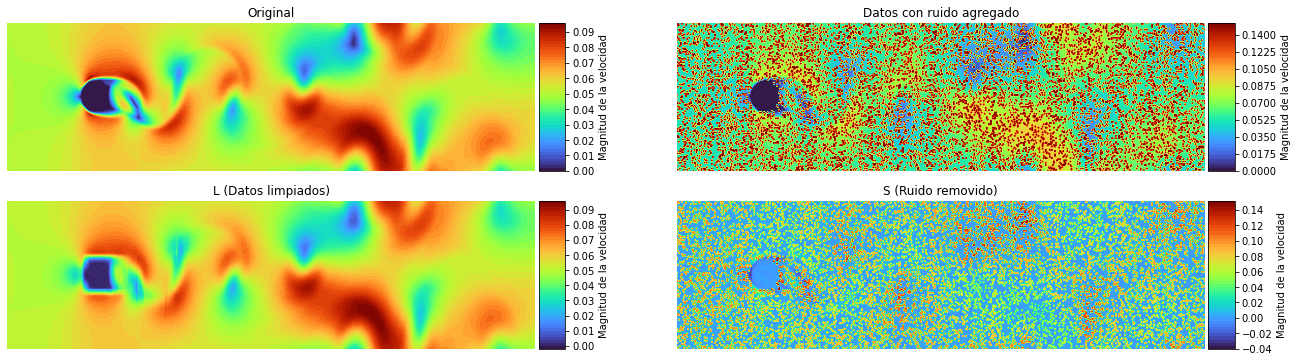

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(22, 6))
ax1 = fig.add_subplot(221)
im1 = ax1.contourf(U, 60, cmap="turbo")
ax1.set_title("Original")
plt.axis("off")
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax, orientation="vertical").set_label("Magnitud de la velocidad")

ax2 = fig.add_subplot(222)
im2 = ax2.contourf(Un, 60, cmap="turbo")
ax2.set_title("Datos con ruido agregado")
plt.axis("off")
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im2, cax=cax, orientation="vertical").set_label("Magnitud de la velocidad")

ax3 = fig.add_subplot(223)
im3 = ax3.contourf(L, 60, cmap="turbo")
ax3.set_title("L (Datos limpiados)")
plt.axis("off")
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im3, cax=cax, orientation="vertical").set_label("Magnitud de la velocidad")

ax4 = fig.add_subplot(224)
im4 = ax4.contourf(S, 60, cmap="turbo")
ax4.set_title("S (Ruido removido)")
plt.axis("off")
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im4, cax=cax, orientation="vertical").set_label("Magnitud de la velocidad")

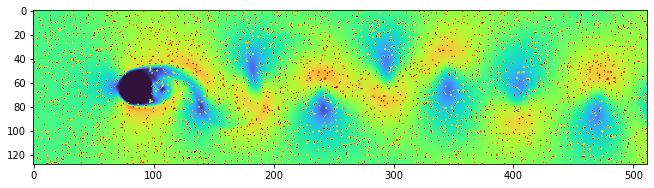

In [15]:

L = np.loadtxt(os.path.join('..', 'lbsim cldr','Noise','csvdata',
                            'velnoise.0199.csv'), delimiter=',')

plt.imshow(L,cmap='turbo')

(-0.5, 511.5, 127.5, -0.5)

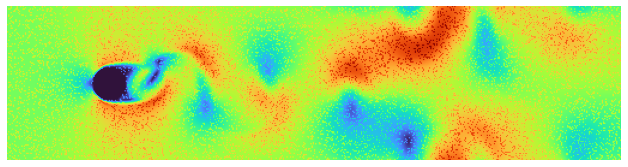

In [13]:
plt.imshow(Unoise, cmap="turbo")
plt.savefig("Unoise")
plt.axis("off")


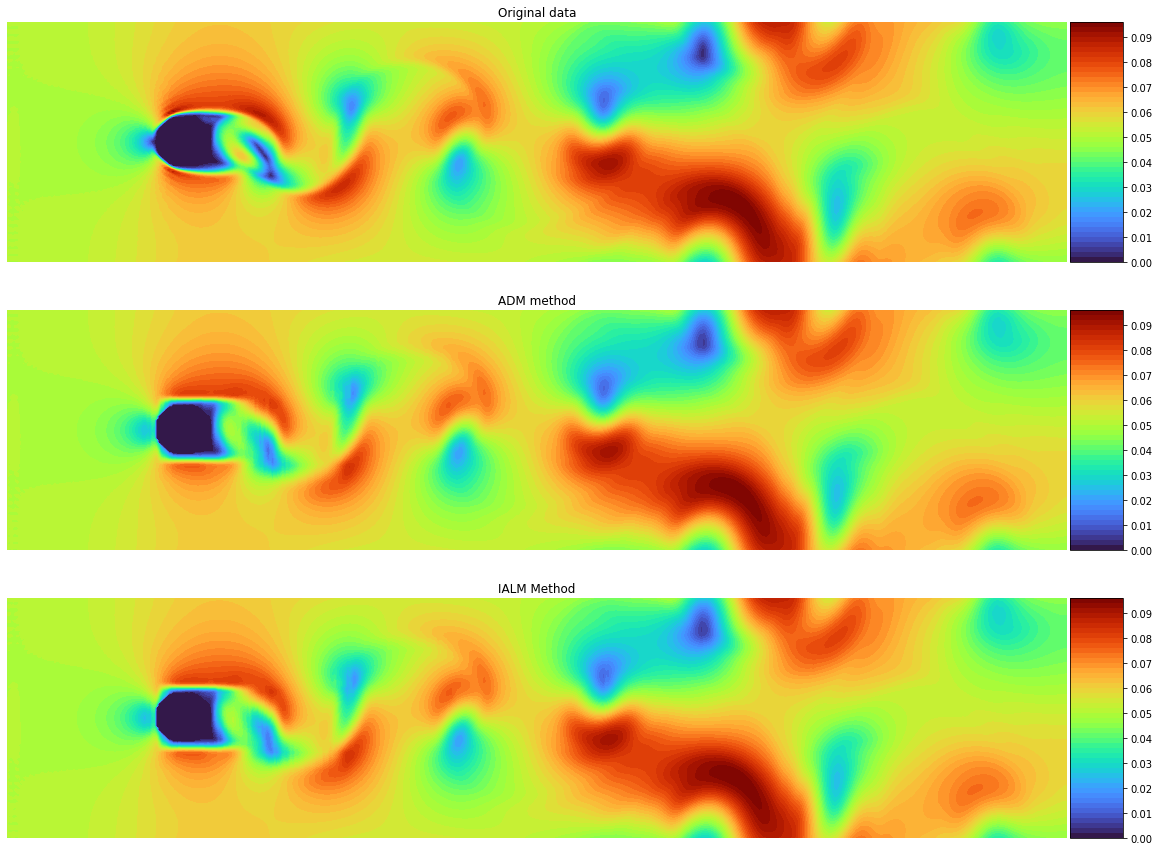

In [22]:
### comparision
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(311)
im1 = ax1.contourf(U, 60, cmap="turbo")
ax1.set_title("Original data")
plt.axis("off")
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax, orientation="vertical")

ax2 = fig.add_subplot(312)
im2 = ax2.contourf(L, 60, cmap="turbo")
ax2.set_title("ADM method")
plt.axis("off")
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im2, cax=cax, orientation="vertical")

ialmL = np.loadtxt(os.path.join('..', 'inalmrpca results','Cleaned',
                            "csvdata", "Lvelnoise.0160.csv"), delimiter=',')
ax3 = fig.add_subplot(313)
im3 = ax3.contourf(ialmL, 60, cmap="turbo")
ax3.set_title("IALM Method")
plt.axis("off")
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im3, cax=cax, orientation="vertical")

